<a href="https://colab.research.google.com/github/dim447/data_analyst/blob/main/FitoFarm01_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задачи исследования**

### Загружаем данные и объединяем семь датасетов - ОЗОН позволяется выгружать данные за 3 месяца.



*1. Осмотр данных*
- посмотрим начало и конец датасета
- сделаем предварительные выводы
- поищем аномалии



*2. Обработка данных*
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- подсчитать и добавить цену квадратного метра
- добавить месяц - вместо даты название месяца
- посмотреть разную статистику, связь товара и склада отгрузки,региона доставки


*3. Ответы на вопросы*
- Какой самый популярный чай? Укажите наиболее важные характеристики
и постройте графики?
- Какую сумму приносит каждая позиция?
- Какие регионы больше всего покупают, какие склады использовать?
- Как загружены склады отгрузки?
- Проверим, куда больше отправляют товар по каждой позиции!



*4. Результаты исследования*
- Общие выводы
- Рекомендации


*Описание данных:*

*   'Дата отгрузки' - Дата отгрузки товара
*   'Месяц отгрузки' - Месяц выделяем из даты
*   'Наименование товара' - Наименование товара
*   'Итоговая стоимость товара' - Сумма продажи товара
*   'Количество' - Количество отгруженного товара
*   'Кластер отгрузки' - Логистика ОЗОН
*   'Кластер доставки' - Логистика ОЗОН
*   'Склад отгрузки' - Склад отгрузки ОЗОН
*   'Регион доставки' - Регион доставки товара
*   'Город доставки' - Город доставки товара (не всегда указан)


In [6]:
### Загружаем данные и объединяем семь датасетов
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df01 = pd.read_csv('/content/orders01_03.csv', sep=';')
df02 = pd.read_csv('/content/orders04_06.csv', sep=';')
df03 = pd.read_csv('/content/orders07_09.csv', sep=';')
df04 = pd.read_csv('/content/orders01-03-22.csv', sep=';')
df05 = pd.read_csv('/content/orders04-06-22.csv', sep=';')
df06 = pd.read_csv('/content/orders07-09-22.csv', sep=';')
df07 = pd.read_csv('/content/orders10-12-22.csv', sep=';')
# df02

In [7]:
df = pd.concat([df01, df02, df03, df04, df05, df06, df07])
df.shape
# df[df["Дата отгрузки"].isnull()]

(6778, 32)

In [8]:
def date_change(dtf):
  for i, data in dtf.iterrows():
    # print(i, type(data["Дата отгрузки"]))
    if type(data["Дата отгрузки"]) is float:
      dtf["Дата отгрузки"] = dtf["Принят в обработку"]

date_change(df)

# df01
df[df["Дата отгрузки"].isnull()]

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия


In [9]:
df.shape

(6778, 32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6778 entries, 0 to 1645
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Номер заказа                 6778 non-null   object 
 1   Номер отправления            6778 non-null   object 
 2   Принят в обработку           6778 non-null   object 
 3   Дата отгрузки                6778 non-null   object 
 4   Статус                       6778 non-null   object 
 5   Дата доставки                6516 non-null   object 
 6   Сумма отправления            6778 non-null   float64
 7   Код валюты отправления       6778 non-null   object 
 8   Наименование товара          6778 non-null   object 
 9   OZON id                      6778 non-null   int64  
 10  Артикул                      6778 non-null   int64  
 11  Итоговая стоимость товара    6778 non-null   float64
 12  Код валюты товара            6778 non-null   object 
 13  Количество        

In [11]:
df.head(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
0,32901413-0114,32901413-0114-1,2023-03-31 19:48:33,2023-03-31 19:48:33,Доставлен,2023-04-05 11:24:30,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
1,33790736-0039,33790736-0039-2,2023-03-31 19:10:52,2023-03-31 19:10:52,Доставлен,2023-04-01 17:18:39,318.0,RUB,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",520745178,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN
2,32901413-0113,32901413-0113-1,2023-03-31 11:17:55,2023-03-31 11:17:55,Отменен,NaN,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
3,31169688-0104,31169688-0104-1,2023-03-31 10:46:57,2023-03-31 10:46:57,Доставлен,2023-04-06 11:15:52,260.0,RUB,"Чай мяты перечной листья 50г/ травяной сбор ""Ц...",520746323,...,Урал,Сургут,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Ханты-Мансийский Автономный округ - Югра,Нягань,ПВЗ,Премиум,нет,Ozon Карта,NaN
4,33007656-0150,33007656-0150-2,2023-03-31 08:43:59,2023-03-31 08:43:59,Доставлен,2023-04-07 06:31:46,157.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN


In [12]:
df.tail(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
1641,10071214-0308,10071214-0308-1,2022-10-01 10:06:24,2022-10-01 10:06:24,Доставлен,2022-10-04 15:42:51,181.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Поволжье,Московская область Восток (Недействительный),КАЗАНЬ_РФЦ_НОВЫЙ,Московская Область,Балашиха,ПВЗ,Не премиум,нет,Картой онлайн,NaN
1642,30449332-0113,30449332-0113-2,2022-10-01 09:02:32,2022-10-01 09:02:32,Доставлен,2022-10-06 15:25:46,181.0,RUB,Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /...,482738956,...,Санкт-Петербург и СЗО,Московская область Юг (Недействительный),САНКТ-ПЕТЕРБУРГ_РФЦ,Московская Область,NaN,ПВЗ,Премиум,нет,Ozon Карта,NaN
1643,56580807-0054,56580807-0054-3,2022-10-01 07:59:09,2022-10-01 07:59:09,Доставлен,2022-10-10 08:40:08,181.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Поволжье,Ленинградская область (Недействительный),КАЗАНЬ_РФЦ_НОВЫЙ,Ленинградская Область,Выборг,Курьер,Не премиум,нет,Картой онлайн,NaN
1644,11226227-0295,11226227-0295-27,2022-10-01 06:49:45,2022-10-01 06:49:45,Доставлен,2022-10-07 17:02:40,180.0,RUB,Чай травяной Домбайский вальс Лесные ягоды ф/п...,482741307,...,Санкт-Петербург и СЗО,Московская область Восток (Недействительный),САНКТ-ПЕТЕРБУРГ_РФЦ,Московская Область,Раменское,ПВЗ,Премиум,нет,Картой онлайн,NaN
1645,11226227-0295,11226227-0295-7,2022-10-01 06:49:45,2022-10-01 06:49:45,Доставлен,2022-10-02 14:30:20,171.0,RUB,Чай травяной Домбайский вальс Облепиха ф/п 1.5...,482743745,...,"Москва, МО и дальние регионы",Московская область Восток (Недействительный),ПУШКИНО_1_РФЦ,Московская Область,Раменское,ПВЗ,Премиум,нет,Картой онлайн,NaN


In [13]:
df.columns

Index(['Номер заказа', 'Номер отправления', 'Принят в обработку',
       'Дата отгрузки', 'Статус', 'Дата доставки', 'Сумма отправления',
       'Код валюты отправления', 'Наименование товара', 'OZON id', 'Артикул',
       'Итоговая стоимость товара', 'Код валюты товара', 'Количество',
       'Стоимость доставки', 'Связанные отправления', 'Выкуп товара',
       'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
       'Объемный вес товаров, кг', 'Кластер отгрузки', 'Кластер доставки',
       'Склад отгрузки', 'Регион доставки', 'Город доставки',
       'Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
       'Способ оплаты', 'Штрихкод ювелирного изделия'],
      dtype='object')

In [14]:
### Убираем ненужные колонки и выбираем случайные 5 записей
# df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
#        'Дата доставки', 'Сумма отправления',
#        'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
#        'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
#        'Объемный вес товаров, кг','Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
#        'Способ оплаты', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)
df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
       'Дата доставки',
       'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
       'Объемный вес товаров, кг', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)
# df = df.drop(['Стоимость доставки'], axis=1)

df.sample(5)

,Дата отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,Акции,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты
174,2022-12-18 16:08:25,Доставлен,161.0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,161.0,1,310.0,48%,149.0,"Хиты. Новый год, Системная виртуальная скидка ...",Поволжье,Московская область Север (Недействительный),НИЖНИЙ_НОВГОРОД_РФЦ,Московская Область,Мытищи,Курьер,Не премиум,нет,Картой онлайн
77,2023-06-19 20:54:35,Доставлен,279.0,"Чай смородины лист 50г/ травяной сбор ""Целебна...",279.0,1,440.0,37%,161.0,"Системная виртуальная скидка селлера, Хиты. О!...",Москва и МО,Московская область Запад 4,ЖУКОВСКИЙ_РФЦ,Московская Область,Красногорск,Курьер,Премиум,нет,Картой онлайн
888,2022-07-15 10:49:54,Доставлен,181.0,Чай травяной Друг Вашей поджелудочной железы ф...,181.0,1,339.0,47%,158.0,"Чайные бонусы 2, Системная виртуальная скидка ...",NaN,Самара,НОВАЯ_РИГА_РФЦ,Самарская Область,NaN,ПВЗ,Премиум,нет,Ozon Карта
537,2023-04-17 15:29:32,Доставлен,157.0,Чай травяной Друг Ваших почек ф/п 1.5г №20 /20...,157.0,1,350.0,55%,193.0,"Системная виртуальная скидка селлера, 🩹💊PH//Ск...",Поволжье,Казань,САМАРА_РФЦ,Татарстан Республика,Казань,Постамат,Премиум,нет,Ozon Карта
783,2022-11-18 12:04:58,Доставлен,153.0,Чай травяной Домбайский вальс Шиповник ф/п 1.5...,153.0,1,310.0,51%,157.0,"Маркетплейс промо №17, Системная виртуальная с...",Юг,Москва Запад (Недействительный),ВОРОНЕЖ_МРФЦ,Москва,Москва,Курьер,Не премиум,нет,Картой онлайн


In [15]:
### Пересохраняем данные без статуса  'Отменен', если нужно проанализировать отмененные заказы,
### меняем условие в запросе df_cancel = df.loc[df['Статус'] == 'Отменен']
df = df.loc[df['Статус'] != 'Отменен']
df.shape

(6539, 19)

In [16]:
### Посчитаем статистику после того, как мы удалили отмененные заказы: Стоимость и количество
df.describe()

,Сумма отправления,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка руб
count,6539.000000,6539.000000,6539.000000,6539.000000,6539.000000
mean,189.644906,185.154478,1.026457,376.026551,195.906790
std,107.639624,97.800629,0.236739,173.469222,114.589432
min,47.500000,47.500000,1.000000,229.000000,80.000000
25%,155.000000,155.000000,1.000000,310.000000,155.000000
50%,162.000000,162.000000,1.000000,339.000000,168.000000
75%,181.000000,181.000000,1.000000,350.000000,190.000000
max,1664.680000,950.000000,8.000000,2233.000000,3980.000000


In [17]:
# # Применим сортировку по месяцам, изначально сортировка была по алфавиту, что не очень удобно.
df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format="%Y-%m-%dT%H:%M:%S")
# df['Дата отгрузки']
# df['Месяц отгрузки'] = df['Месяц отгрузки'].fillna('September')
df.insert(1, 'Год_отгрузки', df['Дата отгрузки'].dt.year)
df.insert(2, 'Месяц отгрузки', df['Дата отгрузки'].dt.month_name())
df = df.drop(['Дата отгрузки'], axis=1)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Месяц отгрузки'] = pd.Categorical(df['Месяц отгрузки'], categories=months, ordered=True)
df.sample(5)


,Год_отгрузки,Месяц отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,Акции,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты
184,2023,September,Доставлен,153.0,Чай травяной Домбайский вальс Шиповник ф/п 1.5...,153.0,1,350.0,56%,197.0,"Системная виртуальная скидка селлера, FMCG_Гло...",Центр,Москва СЗАО,ТВЕРЬ_РФЦ,Москва,Москва,Курьер,Не премиум,нет,Картой онлайн
690,2022,August,Доставлен,181.0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,181.0,1,339.0,47%,158.0,"Чайные бонусы 2, Системная виртуальная скидка ...",Юг,Краснодар,РОСТОВ-НА-ДОНУ_РФЦ,Краснодарский Край,NaN,ПВЗ,Не премиум,нет,Картой онлайн
632,2023,April,Доставлен,305.0,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",305.0,1,440.0,31%,135.0,"Системная виртуальная скидка селлера, 🥧 Проду...",Москва и МО,Москва ЗАО (Недействительный),ПУШКИНО_2_РФЦ,Москва,Москва,Курьер,Премиум,нет,Ozon Карта
623,2022,November,Доставлен,155.0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,155.0,1,310.0,50%,155.0,"Хиты. Черная пятница, Системная виртуальная ск...",Поволжье,Уфа,САМАРА_РФЦ,Башкортостан Республика,Уфа,ПВЗ,Не премиум,нет,Картой онлайн
81,2022,September,Доставлен,156.0,Чай травяной детская линия Комфорт в боботике ...,156.0,1,339.0,54%,183.0,"СуперХиты 2.0. Хочу-Схвачу распродажа, Чайные ...",Санкт-Петербург и СЗО,Санкт-Петербург Север,САНКТ-ПЕТЕРБУРГ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта


In [18]:
### Ищем нулевые ячейки, нас интересует месяц отгрузки и дата отгрузки
df.isnull().sum().sort_values()

Год_отгрузки                   0
Сегмент клиента                0
Способ доставки                0
Склад отгрузки                 0
Кластер доставки               0
Акции                          0
Юридическое лицо               0
Скидка %                       0
Скидка руб                     0
Количество                     0
Итоговая стоимость товара      0
Наименование товара            0
Сумма отправления              0
Статус                         0
Месяц отгрузки                 0
Цена товара до скидок          0
Способ оплаты                  0
Регион доставки               44
Кластер отгрузки             793
Город доставки               814
dtype: int64

In [19]:
# теперь можем видеть количество товара отгруженного по месяцам
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count()

Месяц отгрузки
January       447
February      428
March         554
April         500
May           471
June          386
July          488
August        633
September    1051
October       463
November      619
December      499
Name: Количество, dtype: int64

<Axes: xlabel='Месяц отгрузки'>

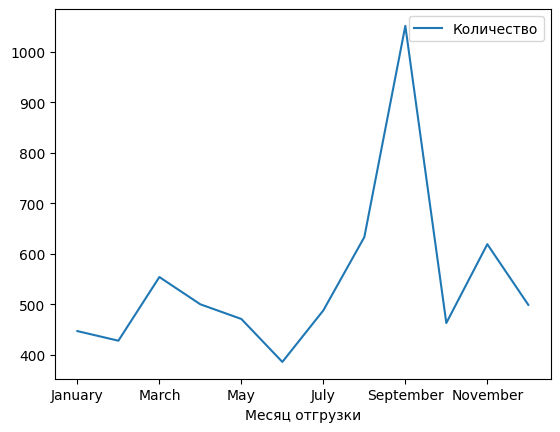

In [20]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count().plot(legend=True)

In [21]:
# а также сумму, не всегда большее количество соответсвует большей сумме
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Месяц отгрузки
January       79813.00
February      93905.18
March         99533.05
April         89769.82
May           83986.05
June          79001.50
July          96653.25
August       120911.00
September    191009.02
October       82323.25
November     104777.01
December      89043.00
Name: Итоговая стоимость товара, dtype: float64

<Axes: xlabel='Месяц отгрузки'>

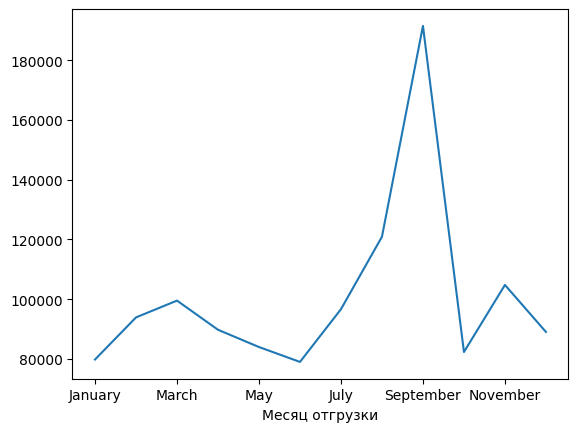

In [ ]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum().plot()

In [22]:
### Выведем общую сумму продаж
df['Итоговая стоимость товара'].sum()

1210725.13

In [23]:
### Дубликаты есть, потому названия товара повторяются
df.duplicated().sum()

837

In [24]:
# Склад отгрузки нет нулевых значений, посмотрим уникальные названия
df['Склад отгрузки'].unique()

array(['АДЫГЕЙСК_РФЦ', 'СПБ_БУГРЫ_РФЦ', 'ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ',
       'ПУШКИНО_2_РФЦ', 'САМАРА_РФЦ', 'ПУШКИНО_1_РФЦ', 'ВОРОНЕЖ_МРФЦ',
       'НИЖНИЙ_НОВГОРОД_РФЦ', 'КАЗАНЬ_РФЦ_НОВЫЙ', 'РОСТОВ-НА-ДОНУ_РФЦ',
       'НОВОСИБИРСК_РФЦ_НОВЫЙ', 'FRESH_MAX_РСТ_ШОЛОХОВО',
       'САНКТ-ПЕТЕРБУРГ_РФЦ', 'КАЛИНИНГРАД_МРФЦ', 'НОВОРОССИЙСК_МРФЦ',
       'FRESH_MAX_РСТ_ЗАПАДНЫЙ', 'КРАСНОЯРСК_МРФЦ', 'ХОРУГВИНО_РФЦ',
       'FRESH_MAX_КДР_ПОНОМАРЕНКО', 'ТВЕРЬ_РФЦ', 'FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ',
       'ЖУКОВСКИЙ_РФЦ', 'FRESH_MAX_КДР_МЕДИА_ПЛАЗА', 'СОФЬИНО_РФЦ',
       'СПБ_ШУШАРЫ_РФЦ', 'НОВАЯ_РИГА_РФЦ'], dtype=object)

In [25]:
# Посмотрим откуда больше всего отгружается товар и отсортируем его по убыванию
sklad_otgruzki = df.groupby('Склад отгрузки')['Количество'].count()
sklad_otgruzki.sort_values(ascending=False)

Склад отгрузки
НОВАЯ_РИГА_РФЦ               787
ПУШКИНО_1_РФЦ                735
РОСТОВ-НА-ДОНУ_РФЦ           675
НИЖНИЙ_НОВГОРОД_РФЦ          624
САМАРА_РФЦ                   603
ВОРОНЕЖ_МРФЦ                 433
СПБ_БУГРЫ_РФЦ                422
ХОРУГВИНО_РФЦ                410
САНКТ-ПЕТЕРБУРГ_РФЦ          342
ПУШКИНО_2_РФЦ                315
ЖУКОВСКИЙ_РФЦ                264
ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ       171
НОВОРОССИЙСК_МРФЦ            169
КАЗАНЬ_РФЦ_НОВЫЙ             155
ТВЕРЬ_РФЦ                    143
АДЫГЕЙСК_РФЦ                 116
СПБ_ШУШАРЫ_РФЦ                82
НОВОСИБИРСК_РФЦ_НОВЫЙ         31
КРАСНОЯРСК_МРФЦ               30
СОФЬИНО_РФЦ                   24
КАЛИНИНГРАД_МРФЦ               2
FRESH_MAX_КДР_ПОНОМАРЕНКО      2
FRESH_MAX_КДР_МЕДИА_ПЛАЗА      1
FRESH_MAX_РСТ_ШОЛОХОВО         1
FRESH_MAX_РСТ_ЗАПАДНЫЙ         1
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ         1
Name: Количество, dtype: int64

In [26]:
# Регион доставки можем также отсортировать,
# 14 нулевых значений не играют большой роли, это скорее всего еще не доставленные товары
reg_deliver = df.groupby(['Регион доставки'])['Количество'].count().sort_values(ascending=False)
reg_deliver.head(20)

Регион доставки
Москва                     1226
Московская Область         1066
Санкт-Петербург             628
Краснодарский Край          534
Ленинградская Область       259
Ростовская Область          229
Татарстан Республика        192
Самарская Область           167
Воронежская Область         149
Нижегородская Область       122
Волгоградская Область        86
Тульская Область             77
Тверская Область             72
Владимирская Область         71
Ставропольский Край          67
Белгородская Область         65
Свердловская Область         58
Республика Коми              56
Саратовская Область          56
Калининградская Область      53
Name: Количество, dtype: int64

In [71]:
# Проверим, что самое популярное из товара, отсортируем продажи по Наименованию и количеству продаж.
# ABC анализ
df_abc = df.groupby('Наименование товара')['Количество'].count().sort_values(ascending=False)
result, res = [], []
sum_result = 0
for i in df_abc:
  procent = round((i / df_abc.sum() * 100), 2)
  result.append(procent)
  sum_result += procent
  if sum_result < 80:
    res.append('A')
  elif 80 <= sum_result < 95:
    res.append('B')
  else:
    res.append('C')


df_abc_new = df_abc.to_frame().reset_index()
df_abc_new['percent'] = result
df_abc_new['sum_res'] = res
df_abc_new

,Наименование товара,Количество,percent,sum_res
0,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,999,15.28,A
1,Чай травяной Друг Вашей поджелудочной железы ф...,674,10.31,A
2,Чай травяной Друг Ваших почек ф/п 1.5г №20 /20...,426,6.51,A
3,"Чайный напиток травяной листья Брусники ф/п 1,...",352,5.38,A
4,Чай травяной Домбайский вальс Облепиха ф/п 1.5...,340,5.20,A
5,Чай травяной Друг Вашего давления ф/п 1.5г №20...,319,4.88,A
6,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,318,4.86,A
7,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,315,4.82,A
8,Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /...,242,3.70,A
9,Чай травяной Друг Вашего сердца ф/п 1.5г №20 /...,212,3.24,A


In [ ]:
# Доставка по условию: Регион доставки 'Краснодарский Край'
krasnd_krai = df[df['Регион доставки'] == 'Краснодарский Край'].groupby(['Наименование товара'])['Количество'].count()
krasnd_krai.sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           78
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             67
Чай травяной Друг Вашего давления ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                          59
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              35
Чай травяной Друг Вашего сердца ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                            29
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                             25
Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                            23
Чай травяной Друг Ваших суставов ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           22
Чай травяной Друг Вашего иммунитета ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БА

In [ ]:
### Отсортируем Товар по сумме продаж.
df.groupby('Наименование товара')['Итоговая стоимость товара'].sum().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           163132.85
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             136038.25
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                               71595.71
Экстракт трав в капсулах "Друг вашей поджелудочной железы", 60 капсул, БАД                                    69545.34
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор     58299.60
Чай травяной Домбайский вальс Облепиха ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай                           54979.87
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              52477.61
Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД                              51492.06
Чай травяной Друг Вашего дав

In [ ]:
# Проверим откуда и куда больше отправляют товар, отсортируем Склад отгрузки  и Регион доставки
# df.rename(columns={"Склад отгрузки": "Склад_отгрузки", "Регион доставки": "Регион_доставки"}, inplace=True)
name_region = df.groupby(['Склад отгрузки', 'Регион доставки'])['Количество'].count()
# Можно выгрузить данные по "Склад" - "Регион" в файл excel
name_region.to_excel("output.xlsx")
name_region


Склад отгрузки             Регион доставки                
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ     Волгоградская Область              1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА  Краснодарский Край                 1
FRESH_MAX_КДР_ПОНОМАРЕНКО  Краснодарский Край                 2
FRESH_MAX_РСТ_ЗАПАДНЫЙ     Ростовская Область                 1
FRESH_MAX_РСТ_ШОЛОХОВО     Ростовская Область                 1
                                                             ..
ХОРУГВИНО_РФЦ              Челябинская Область                1
                           Чеченская Республика               3
                           Чувашская Республика - Чувашия     1
                           Ямало-Ненецкий Автономный округ    1
                           Ярославская Область                2
Name: Количество, Length: 643, dtype: int64

In [ ]:
# Анализ доставки в регионы по каждому складу - 'ХОРУГВИНО_РФЦ'
name_region_horugvino = df[df['Склад отгрузки'] == 'ХОРУГВИНО_РФЦ'].groupby(['Склад отгрузки', 'Регион доставки'])['Количество'].count()
name_region_horugvino.sort_values(ascending=False)

Склад отгрузки  Регион доставки                         
ХОРУГВИНО_РФЦ   Москва                                      138
                Московская Область                          112
                Санкт-Петербург                              19
                Краснодарский Край                           13
                Самарская Область                            13
                Татарстан Республика                         11
                Владимирская Область                         10
                Ленинградская Область                         9
                Рязанская Область                             7
                Республика Коми                               7
                Саратовская Область                           6
                Нижегородская Область                         4
                Калининградская Область                       4
                Калужская Область                             3
                Мурманская Область             

In [ ]:
# Анализ доставки в регионы по каждому складу - 'АДЫГЕЙСК_РФЦ'
name_region_adygey = df[df['Склад отгрузки'] == 'АДЫГЕЙСК_РФЦ'].groupby(['Склад отгрузки', 'Регион доставки'])['Количество'].count()
name_region_adygey.sort_values(ascending=False)

Склад отгрузки  Регион доставки                    
АДЫГЕЙСК_РФЦ    Краснодарский Край                     65
                Ростовская Область                     10
                Воронежская Область                     9
                Волгоградская Область                   8
                Ставропольский Край                     6
                Республика Северная Осетия - Алания     3
                Санкт-Петербург                         2
                Белгородская Область                    2
                Республика Ингушетия                    2
                Астраханская Область                    1
                Тюменская Область                       1
                Сахалинская Область                     1
                Псковская Область                       1
                Пермский Край                           1
                Московская Область                      1
                Крым Республика                         1
                Воло

In [ ]:
# Проверим откуда больше отправляют товар, отсортируем Наименование и Склад отгрузки
name_tea_by_storage = df[df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД'].groupby(['Наименование товара', 'Склад отгрузки'])['Количество'].count()
name_tea_by_storage.sort_values(ascending=False)

Наименование товара                                                                 Склад отгрузки        
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД  САМАРА_РФЦ                114
                                                                                    НОВАЯ_РИГА_РФЦ            113
                                                                                    НИЖНИЙ_НОВГОРОД_РФЦ       109
                                                                                    ПУШКИНО_1_РФЦ             106
                                                                                    ВОРОНЕЖ_МРФЦ               98
                                                                                    РОСТОВ-НА-ДОНУ_РФЦ         96
                                                                                    ЖУКОВСКИЙ_РФЦ              61
                                                                                    ХОРУГВИНО_Р

In [ ]:
# Проверим куда больше отправляют товар, отсортируем Наименование и регион доставки
name_tea_by_region = df[df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД'].groupby(['Наименование товара', 'Регион доставки'])['Количество'].count()
name_tea_by_region.sort_values(ascending=False)


Наименование товара                                                                 Регион доставки                
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД  Московская Область                 176
                                                                                    Москва                             174
                                                                                    Санкт-Петербург                     91
                                                                                    Краснодарский Край                  78
                                                                                    Ростовская Область                  33
                                                                                                                      ... 
                                                                                    Карачаево-Черкесская Республика      1
                       

In [ ]:
# Еще один параметр - склад отгрузки. Какой товар больше отправляют с какого склада.
name_sklad = df.groupby(['Склад отгрузки', 'Наименование товара'])['Количество'].count()
name_sklad.head(50)

Склад отгрузки             Наименование товара                                                                                      
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_ПОНОМАРЕНКО  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              2
FRESH_MAX_РСТ_ЗАПАДНЫЙ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_РСТ_ШОЛОХОВО     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
АДЫГЕЙСК_РФЦ               Фитосбор "Для печени", 2 пачки по 20 фильтр-пакетов травяного чая                                             1
                           Фитосб

In [ ]:
# Также можно вывести отдельно по каждой позиции статистику по месяцам: Количество и Сумму.
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Количество'].count()

Наименование товара  Месяц отгрузки
False                January           393
                     February          385
                     March             461
                     April             418
                     May               411
                     June              318
                     July              410
                     August            519
                     September         908
                     October           356
                     November          522
                     December          441
True                 January            54
                     February           43
                     March              93
                     April              82
                     May                60
                     June               68
                     July               78
                     August            114
                     September         145
                     October           107
                  

In [ ]:
# @title
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Наименование товара  Месяц отгрузки
False                January            71736.00
                     February           86302.66
                     March              85103.02
                     April              77056.34
                     May                74409.11
                     June               67896.00
                     July               83336.26
                     August            101423.42
                     September         167479.02
                     October            63586.63
                     November           89720.57
                     December           80024.25
True                 January             8077.00
                     February            7602.52
                     March              14430.03
                     April              12713.48
                     May                 9576.94
                     June               11105.50
                     July               13316.99
                     August      

# 4. Результаты исследования

### Общие выводы
С помощью данного инструмента (pandas) мы можем провести анализ как по каждой позиции - количество продаж, сумма, с какого склада и в какой регион больше отправка, так и видеть общую картину в целом. Определять пик продаж по месяцам, а нужно и по неделям. Группировать продажи, комбинировать разные параметры. Визуализация позволяет строить как обычные графики, так и в виде гистограм, круговых диаграм. Данный пример показывает возможности обработки данных его анализа и вывода результатов. Также возможен вывод данных в любой удобный формат, как ecxel, csv, json.
### Рекомендации
1.   Рекомендовать увеличить поставки наиболее продаваемого товара
2.   Использовать скидки в месяцы с наименьшими продажами
3.   В летние месяцы спад продаж, осенью и зимой больше затаривать склады
4.   Больше поставлять товар в регионы, но и не забывать про центр и северо-запад.



